In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
"""
Load the training data.
Display the first 5 entries
"""
TRAINING_DATA_PATH = "./data/train.csv"
def load_training_data(training_data_path=TRAINING_DATA_PATH):
    return pd.read_csv(training_data_path)

training_data = load_training_data()
training_data.head()

C:\Users\arman\AppData\Local\Temp/ipykernel_17220/3196200410.py:9: DtypeWarning: Columns (15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  training_data = load_training_data()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal


In [8]:
"""
Display some useful statistics about the data
From this we learn that there are 41 features and one column for labels
"""
training_data.info(show_counts=True)
# training_data["protocol_type"].value_counts()
# training_data["service"].value_counts()
training_data["label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     4898431 non-null  int64  
 1   protocol_type                4898431 non-null  object 
 2   service                      4898431 non-null  object 
 3   flag                         4898431 non-null  object 
 4   src_bytes                    4898431 non-null  int64  
 5   dst_bytes                    4898431 non-null  int64  
 6   land                         4898431 non-null  int64  
 7   wrong_fragment               4898431 non-null  int64  
 8   urgent                       4898431 non-null  int64  
 9   hot                          4898431 non-null  int64  
 10  num_failed_logins            4898431 non-null  int64  
 11  logged_in                    4898431 non-null  int64  
 12  num_compromised              4898431 non-n

smurf              2807886
neptune            1072017
normal              972780
satan                15892
ipsweep              12481
portsweep            10413
nmap                  2316
back                  2203
warezclient           1020
teardrop               979
pod                    264
guess_passwd            53
buffer_overflow         30
land                    21
warezmaster             20
imap                    12
rootkit                 10
loadmodule               9
ftp_write                8
multihop                 7
phf                      4
perl                     3
spy                      2
000                      1
Name: label, dtype: int64

In [26]:
training_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,...,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06,4.89843e+06
mean,48.3424,1834.62,1093.62,5.71612e-06,0.000648779,7.96173e-06,0.0124377,3.20511e-05,0.143529,0.0080883,...,232.981,189.214,0.753713,0.0307111,0.605052,0.00646431,0.178093,0.177886,0.0579278,0.0576594
std,723.33,941431,645012,0.00239083,0.0428543,0.00721508,0.468978,0.00729941,0.350611,3.85648,...,64.0209,105.913,0.411186,0.108543,0.480988,0.0412622,0.381859,0.382177,0.230943,0.230978
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,0,45,0,0,0,0,0,0,0,0,...,255,49,0.41,0,0,0,0,0,0,0
50%,0,520,0,0,0,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0
75%,0,1032,0,0,0,0,0,0,0,0,...,255,255,1,0.04,1,0,0,0,0,0
max,58329,1.37996e+09,1.30994e+09,1,3,14,77,5,1,7479,...,255,255,1,1,1,1,9,1,1,1


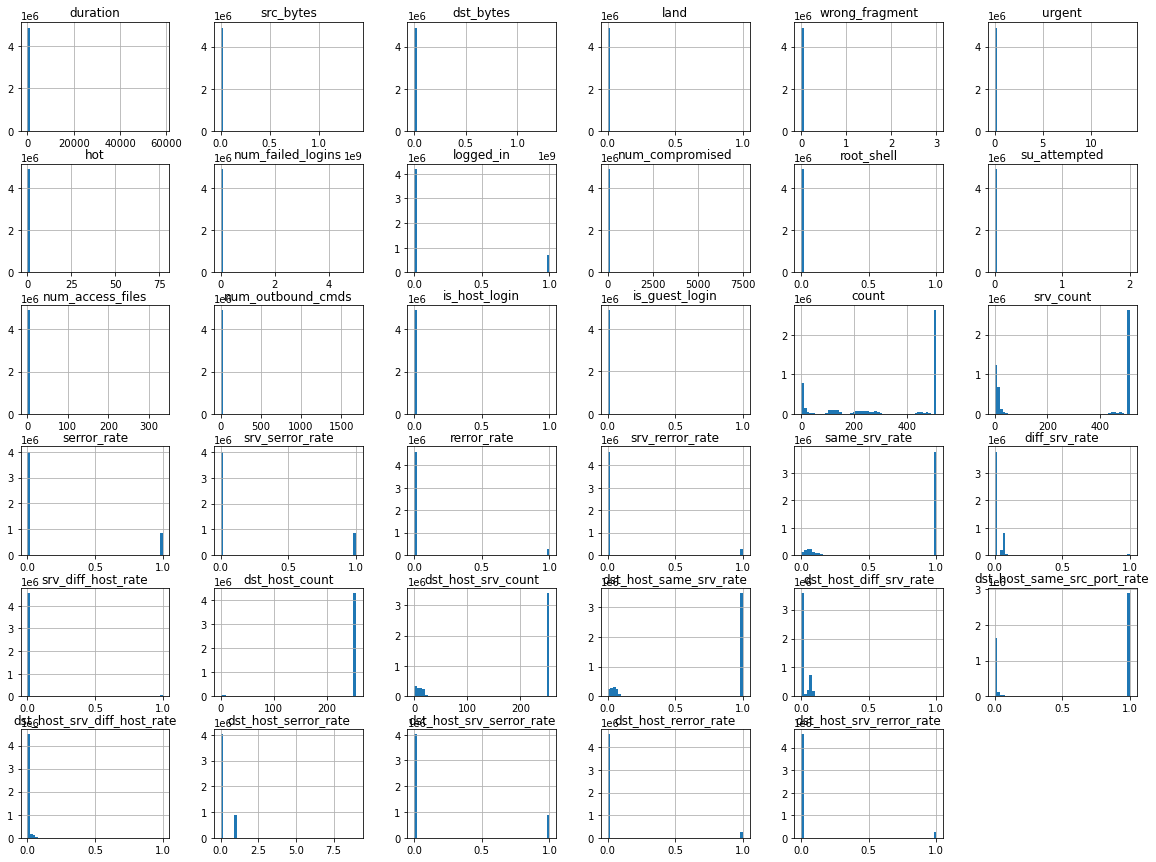

In [28]:
training_data.hist(bins=50, figsize=(20,15))
plt.show()


In [30]:
# Compute the standard corelation coefficient
corr_matrix = training_data.corr()

In [33]:
corr_matrix["su_attempted"].sort_values(ascending=False)

su_attempted                   1.000000
root_shell                     0.455745
num_compromised                0.349526
urgent                         0.133023
num_failed_logins              0.069186
num_access_files               0.059435
duration                       0.052088
logged_in                      0.011106
dst_host_srv_diff_host_rate    0.006156
dst_host_diff_srv_rate         0.003444
same_srv_rate                  0.002389
hot                            0.001926
dst_bytes                      0.001204
num_outbound_cmds             -0.000002
is_host_login                 -0.000003
src_bytes                     -0.000004
land                          -0.000011
wrong_fragment                -0.000069
is_guest_login                -0.000131
srv_diff_host_rate            -0.000195
dst_host_srv_serror_rate      -0.000204
dst_host_rerror_rate          -0.000263
dst_host_srv_rerror_rate      -0.000338
dst_host_serror_rate          -0.000372
rerror_rate                   -0.000476
